In [2]:
import pandas as pd
import numpy as np
from ua_parser import user_agent_parser
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"logdata.csv")

In [4]:
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10
0,87.116.74.253,-,-,[28/Feb/2022:14:04:44,+0200],POST /wp-admin/admin-ajax.php HTTP/2.0,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,91.196.124.220,-,-,[28/Feb/2022:14:04:47,+0200],POST /wp-cron.php?doing_wp_cron=1646049887.247...,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
2,91.196.124.220,-,-,[28/Feb/2022:14:06:45,+0200],POST /wp-cron.php?doing_wp_cron=1646050005.394...,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
3,87.116.74.253,-,-,[28/Feb/2022:14:06:44,+0200],POST /wp-admin/admin-ajax.php HTTP/2.0,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
4,66.249.70.57,-,-,[28/Feb/2022:14:06:46,+0200],GET /category/alpaca-bowls/ HTTP/1.1,200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [5]:
data.drop(['Column2','Column3'],axis=1,inplace = True)

In [6]:
data['Column2'] = data['Column4']+data['Column5']

In [7]:
data.drop(['Column4','Column5'],axis=1,inplace = True)

In [8]:
sample_data = {'Col6': data['Column6']}
df = pd.DataFrame(sample_data)
split_columns = df['Col6'].str.split(expand=True)
df[['HTTP_Method', 'Requested_URL', 'HTTP_Version']] = split_columns

df.drop(columns=['Col6'], inplace=True)

In [9]:
df.head()

,HTTP_Method,Requested_URL,HTTP_Version
0,POST,/wp-admin/admin-ajax.php,HTTP/2.0
1,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,HTTP/1.1
2,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,HTTP/1.1
3,POST,/wp-admin/admin-ajax.php,HTTP/2.0
4,GET,/category/alpaca-bowls/,HTTP/1.1


In [10]:
data.rename(columns = {'Column1':'IP','Column2':'DateTime','Column7':'StatusCode','Column8':'BytesSent',
                       'Column9':'Referrer','Column10':'UserAgent'},inplace=True)

In [11]:
data['HTTP_Method'] = df['HTTP_Method']
data['URL'] = df['Requested_URL']
data['HTTP_Version'] = df['HTTP_Version']

In [12]:
data.drop('Column6',axis=1,inplace=True)

In [14]:
data.to_csv(r'LogDataFinal.csv')

In [13]:
data.head()

,IP,StatusCode,BytesSent,Referrer,UserAgent,DateTime,HTTP_Method,URL,HTTP_Version
0,87.116.74.253,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,[28/Feb/2022:14:04:44+0200],POST,/wp-admin/admin-ajax.php,HTTP/2.0
1,91.196.124.220,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,[28/Feb/2022:14:04:47+0200],POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,HTTP/1.1
2,91.196.124.220,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,[28/Feb/2022:14:06:45+0200],POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,HTTP/1.1
3,87.116.74.253,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,[28/Feb/2022:14:06:44+0200],POST,/wp-admin/admin-ajax.php,HTTP/2.0
4,66.249.70.57,200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,[28/Feb/2022:14:06:46+0200],GET,/category/alpaca-bowls/,HTTP/1.1


In [13]:
#Top 10 unique ip addresses
ip_count = data['IP'].value_counts().head(10)
ip_count

35.210.207.218     2322
87.116.74.253      1957
91.196.124.220     1884
130.204.199.252    1209
149.62.203.226     1161
212.39.89.183      1112
46.10.120.188      1087
95.42.145.40       1067
149.62.202.254      985
212.39.89.155       973
Name: IP, dtype: int64

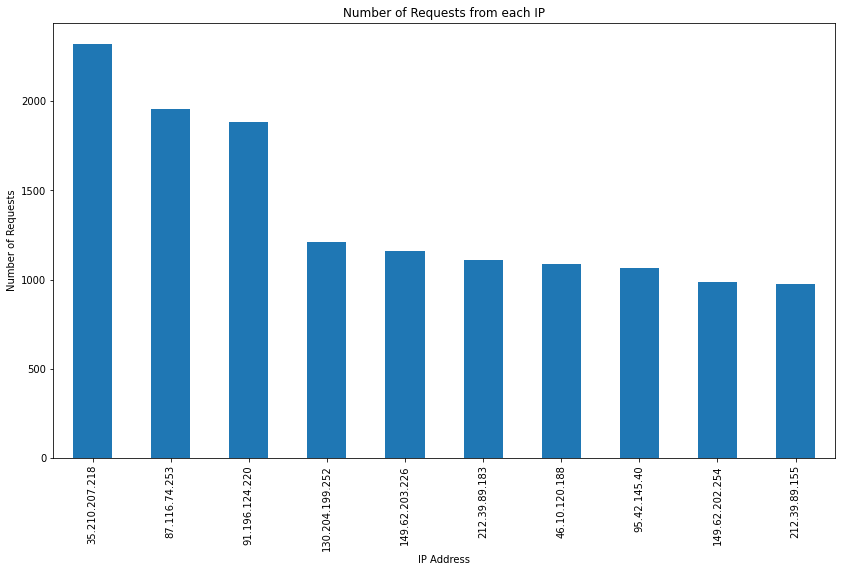

In [14]:
#Bar graph between number of requests for each ip
plt.figure(figsize = (14,8))
ip_count.plot(kind = 'bar')
plt.title('Number of Requests from each IP')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.show()

In [15]:
#URL hits in descending order
data['URL'].value_counts()

/wp-admin/admin-ajax.php                                                                       1412
/wp-content/uploads/2021/05/HLGN-Logo.png                                                      1289
/?wc-ajax=get_refreshed_fragments                                                              1193
/                                                                                              1146
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                               515
                                                                                               ... 
/wp-cron.php?doing_wp_cron=1646154070.8829109668731689453125                                      1
/wp-admin/admin-ajax.php?city=St&action=econt_handle_ajax                                         1
/wp-admin/admin-ajax.php?action=econt_handle_ajax&office_city_id=45&delivery_type=to_office       1
/wp-cron.php?doing_wp_cron=1646118571.3258769512176513671875                                      1


In [16]:
#URL with maximum hits
print("Maximum hits to url are : ",data['URL'].value_counts().head(1))

Maximum hits to url are :  /wp-admin/admin-ajax.php    1412
Name: URL, dtype: int64


In [17]:
#To extract the browser and platform from User Agent
def extract_browser_platform(user_agent_str):
    if isinstance(user_agent_str, str):
        parsed_ua = user_agent_parser.Parse(user_agent_str)
        return parsed_ua['user_agent']['family'], parsed_ua['os']['family']
    else:
        return None, None

data['Browser'], data['Platform'] = zip(*data['UserAgent'].apply(extract_browser_platform))


In [18]:
#Hits per platform 
p_count = data['Platform'].value_counts()
p_count

iOS         38120
Android     28606
Windows     20586
Other        6826
Mac OS X     5773
Ubuntu         69
Linux          19
Name: Platform, dtype: int64

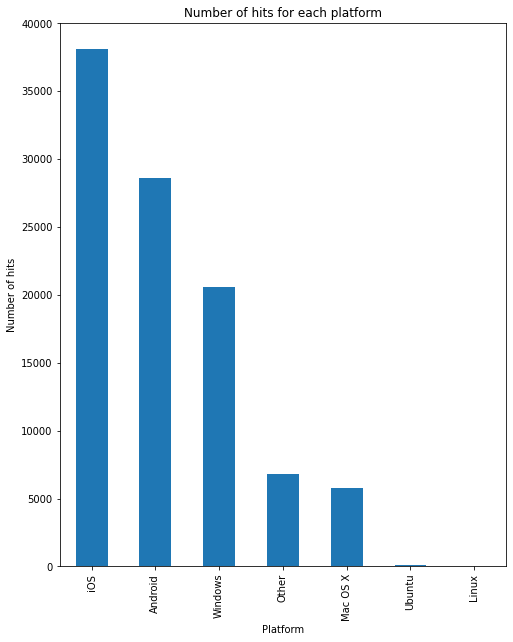

In [19]:
#Line graph between number of hits for each platform
plt.figure(figsize = (8,10))
p_count.plot(kind = 'bar')
plt.title('Number of hits for each platform')
plt.xlabel('Platform')
plt.ylabel('Number of hits')
plt.show()

In [20]:
#Hits per browser
b_count = data['Browser'].value_counts()
b_count

Mobile Safari                   24866
Chrome Mobile                   18418
Chrome                          16879
Instagram                       10044
Chrome Mobile WebView            3299
Opera                            2820
Firefox                          2661
Google                           2485
VelenPublicWebCrawler            2322
Safari                           2239
Edge                             2088
WordPress                        2030
Facebook                         1818
Chrome Mobile iOS                1631
Samsung Internet                 1403
Mobile Safari UI/WKWebView       1041
bingbot                           888
Googlebot                         719
Opera Mobile                      494
FacebookBot                       409
Go-http-client                    311
Firefox Mobile                    241
Applebot                          132
Googlebot-Image                   114
AhrefsBot                         111
Other                             106
PetalBot    

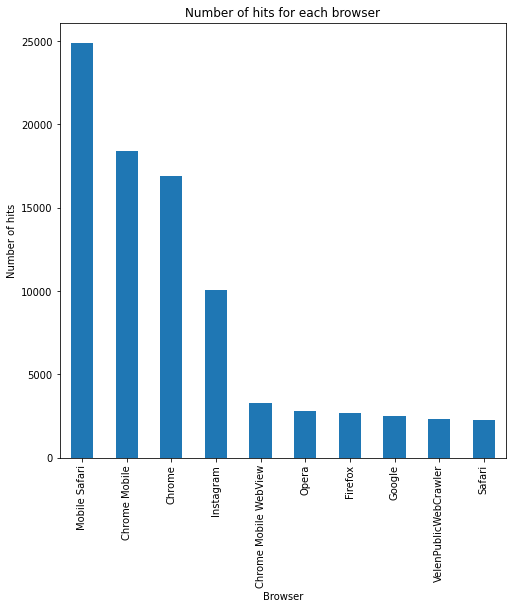

In [21]:
#Line graph between number of hits for each platform
plt.figure(figsize = (8,8))
b_count.head(10).plot(kind = 'bar')
plt.title('Number of hits for each browser')
plt.xlabel('Browser')
plt.ylabel('Number of hits')
plt.show()

In [22]:
#Total no. of https codes 
count1 = 0
for i in data['Referrer']:
    if isinstance(i, str) and 'https' in i:
        count1 += 1

print("Number of http codes are:", count1)

Number of http codes are: 93396


In [23]:
data.head()

,IP,StatusCode,BytesSent,Referrer,UserAgent,DateTime,HTTP_Method,URL,HTTP_Version,Browser,Platform
0,87.116.74.253,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,[28/Feb/2022:14:04:44+0200],POST,/wp-admin/admin-ajax.php,HTTP/2.0,Chrome,Mac OS X
1,91.196.124.220,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,[28/Feb/2022:14:04:47+0200],POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,HTTP/1.1,WordPress,Other
2,91.196.124.220,200.0,-,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg,[28/Feb/2022:14:06:45+0200],POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,HTTP/1.1,WordPress,Other
3,87.116.74.253,200.0,47,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,[28/Feb/2022:14:06:44+0200],POST,/wp-admin/admin-ajax.php,HTTP/2.0,Chrome,Mac OS X
4,66.249.70.57,200.0,262929,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,[28/Feb/2022:14:06:46+0200],GET,/category/alpaca-bowls/,HTTP/1.1,Googlebot,Other


In [24]:
data['DateTime'] = data['DateTime'].str.strip('[]')
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%b/%Y:%H:%M:%S%z')
data['DateTime']

0        2022-02-28 14:04:44+02:00
1        2022-02-28 14:04:47+02:00
2        2022-02-28 14:06:45+02:00
3        2022-02-28 14:06:44+02:00
4        2022-02-28 14:06:46+02:00
                    ...           
99996    2022-03-01 20:43:01+02:00
99997    2022-03-01 20:43:07+02:00
99998    2022-03-01 20:43:11+02:00
99999    2022-03-01 20:43:18+02:00
100000   2022-03-01 20:43:24+02:00
Name: DateTime, Length: 100001, dtype: datetime64[ns, pytz.FixedOffset(120)]

In [26]:
# - Calculate top 10 URL hits for each hour 
dt_group = data[['DateTime','Referrer','URL']].groupby([data['DateTime'].dt.hour])
#dt_group

URL_count = dt_group['URL'].value_counts() 
URL_count.groupby(['DateTime']).head(10)


DateTime  URL                                                                        
0.0       /                                                                              191
          /?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999               38
          /wp-content/uploads/2021/05/HLGN-Logo.png                                       31
          /?wc-ajax=get_refreshed_fragments                                               20
          /category/nargileta/                                                             7
                                                                                        ... 
23.0      /wp-content/uploads/2019/12/nargilebg-logo.png                                  15
          /category/nargileta/                                                            13
          /wp-content/plugins/jetpack/css/jetpack.css?ver=10.6                            12
          /wp-content/plugins/revslider/public/assets/css/rs6.css?ver=6.5.13 